# Transverse isotropy linear elasticity

In [2]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import math
import os

In thermoelastic orthotropic materials twelve parameters are required: 

1. The Young modulus of axis 1 $E_1$,
2. The Young modulus of axis 2 $E_2$,
3. The Young modulus of axis 3 $E_3$,
4. The Poisson ratio of direction 1 with respect to 2 $\nu_{12}$,
5. The Poisson ratio of direction 1 with respect to 3 $\nu_{13}$,
6. The Poisson ratio of direction 2 with respect to 3 $\nu_{13}$,
7. The shear modulus of direction 1 with respect to 2 $G_{12}$,
8. The shear modulus of direction 1 with respect to 3 $G_{13}$,
9. The shear modulus of direction 2 with respect to 3 $G_{23}$,
10. The axial coefficient of thermal expansion in direction 1 $\alpha_1$,
11. The axial coefficient of thermal expansion in direction 1 $\alpha_2$,
12. The axial coefficient of thermal expansion in direction 1 $\alpha_3$,

The elastic stiffness tensor and the thermal expansion coefficients tensor are written in SMART+ formalism as

$$\boldsymbol{L}=\left(\begin{matrix} L_{1111} & L_{1122} & L_{1133} & 0 & 0 & 0 \\ L_{1122} & L_{2222} & L_{2233} & 0 & 0 & 0 \\ L_{1133} & L_{2233} & L_{3333} & 0 & 0 & 0 \\ 0 & 0 & 0 & L_{1212} & 0 & 0 \\ 0 & 0 & 0 & 0 & L_{1313} & 0 \\ 0 & 0 & 0 & 0 & 0 & L_{2323} \end{matrix}\right), \quad \boldsymbol{\alpha}=\left(\begin{matrix} \alpha_L & 0 & 0 \\ 0 & \alpha_T & 0 \\ 0 & 0 & \alpha_T \end{matrix}\right),$$

where $$\begin{array}{c}\displaystyle{L_{1111}=E_1~(1-\nu_{23}\nu_{32})~\Delta, \quad L_{1122}=E_1~(\nu_{21}+\nu_{31}\nu_{23} \Delta, L_{1133} = E_1~(\nu_{31}+\nu_{21}\nu_{32}} \\
\displaystyle{L_{2222}= E_2~(1-\nu_{13}\nu_{31})~\Delta, \quad L_{2233}= E_2~(\nu_{yz}+\nu_{zx}\nu_{yz} \Delta,         \quad L_{2233} = E_3 (1-\nu_{12}\nu_{21})~\Delta} \\
\displaystyle{\quad L_{1212}= G_{12}, \quad \quad L_{1313}= G_{13}, \quad \quad L_{2323}= G_{23},}\\
\displaystyle{\Delta= \frac{1}{1-\nu_{12}\nu_{21}-\nu_{23}\nu_{32}-\nu_{31}\nu_{13}-2\nu_{21}\nu_{32}\nu_{13}}}\end{array}$$

Also, all the Poisson's ratio are defined as:
$$\begin{array}{c} \nu_{21}= \nu_{12} \frac{E_2}{E_1} \\
\nu_{32}= \nu_{23}\frac{E_3}{E_2} \\
\nu_{31}= \nu_{13}\frac{E_3}{E_1} \end{array}$$ 


Details on the elastic stiffness tensor of transversely isotropic media can be found in Christensen (1979). For axis of transverse isotropy being 2 or 3, the above tensors are properly rotated. The tangent stiffness tensor in this case is $\boldsymbol{L}^t=\boldsymbol{L}$. Moreover, the increment of the elastic strain is given by 

$$\Delta\varepsilon^{\textrm{el}}_{ij}=\Delta\varepsilon^{\textrm{tot}}_{ij}-\alpha_{ij}\Delta T.$$

In the 1D case only one component of stress is computed, through the relation 

$$\sigma^{\textrm{fin}}_{11}=\sigma^{\textrm{init}}_{11}+L_{1111}\Delta\varepsilon^{\textrm{el}}_{11}.$$

In the plane stress case only three components of stress are computed, through the relations 

$$\left(\begin{matrix} \sigma^{\textrm{fin}}_{11} \\ \sigma^{\textrm{fin}}_{22} \\ \sigma^{\textrm{fin}}_{12} \end{matrix}\right) =\left(\begin{matrix} \sigma^{\textrm{init}}_{11} \\ \sigma^{\textrm{init}}_{22} \\ \sigma^{\textrm{init}}_{12} \end{matrix}\right)+\boldsymbol{K} \left(\begin{matrix} \Delta\varepsilon^{\textrm{el}}_{11} \\ \Delta\varepsilon^{\textrm{el}}_{22} \\ 2\Delta\varepsilon^{\textrm{el}}_{12} \end{matrix}\right),$$

with $$\boldsymbol{K}=\left(\begin{matrix} \displaystyle{L_{1111}-\frac{L_{1133}L_{3311}}{L_{3333}}} & \displaystyle{L_{1122}-\frac{L_{1133}L_{3322}}{L_{3333}}} & \displaystyle{L_{1112}-\frac{L_{1133}L_{3312}}{L_{3333}}} \\ \displaystyle{L_{2211}-\frac{L_{2233}L_{3311}}{L_{3333}}} & \displaystyle{L_{2222}-\frac{L_{2233}L_{3322}}{L_{3333}}} & \displaystyle{L_{2212}-\frac{L_{2233}L_{3312}}{L_{3333}}} \\ \displaystyle{L_{1211}-\frac{L_{1233}L_{3311}}{L_{3333}}} & \displaystyle{L_{1222}-\frac{L_{1233}L_{3322}}{L_{3333}}} & \displaystyle{L_{1212}-\frac{L_{1233}L_{3312}}{L_{3333}}} \end{matrix}\right).$$

In the generalized plane strain/3D analysis case the stress tensor is computed through the relation

$$\sigma^{\textrm{fin}}_{ij}=\sigma^{\textrm{init}}_{ij}+L_{ijkl}~\Delta\varepsilon^{\textrm{el}}_{kl}.$$

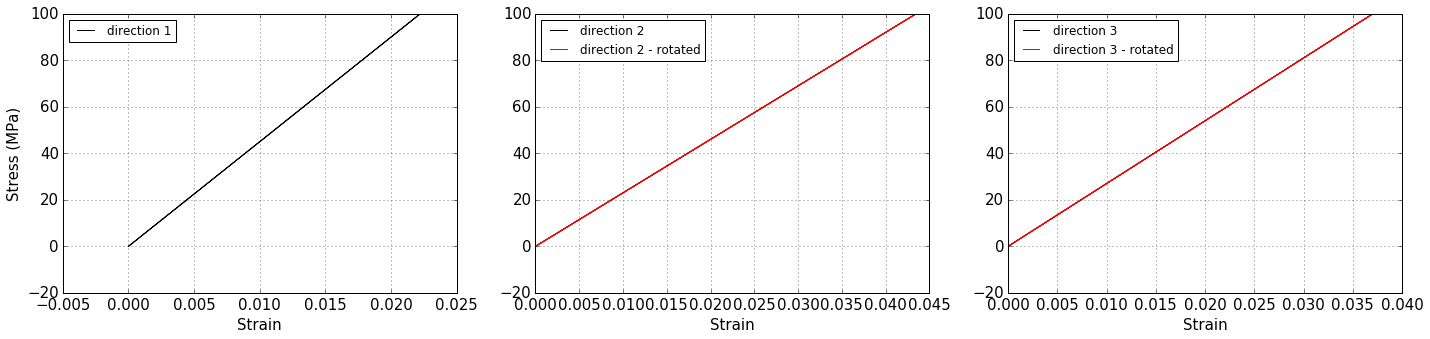

In [6]:
umat_name = 'ELORT' #This is the 5 character code for the elastic transversely isotropic subroutine
nstatev = 1 #The number of scalar variables required, only the initial temperature is stored here

rho = 1.12 #The density of the material 
c_p = 1.64 #The specific heat capacity


E_1 = 4500
E_2 = 2300
E_3 = 2700
nu_12 = 0.06
nu_13 = 0.08
nu_23 = 0.3
G_12 = 2200
G_13 = 2100
G_23 = 2400
alpha_1 = 1.E-5
alpha_2 = 2.5E-5
alpha_3 = 2.2E-5

props = np.array([E_1, E_2, E_3, nu_12, nu_13, nu_23, G_12, G_13, G_23, alpha_1, alpha_2, alpha_3])

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

dir = os.path.dirname(os.path.realpath('__file__'))
pathfile = dir + '/path_1.txt'
outputfile_1 = dir + '/results_ELORT_1.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_1)
outputfile_1 = dir + '/results_ELORT_1_global-0.txt'

pathfile = dir + '/path_2.txt'
outputfile_2 = dir + '/results_ELORT_2.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_2)
outputfile_2 = dir + '/results_ELORT_2_global-0.txt'

pathfile = dir + '/path_3.txt'
outputfile_3 = dir + '/results_ELORT_3.txt'
sim.solver(umat_name, props, nstatev, rho, psi_rve, theta_rve, phi_rve, c_p, pathfile, outputfile_3)
outputfile_3 = dir + '/results_ELORT_3_global-0.txt'

pathfile = dir + '/path_1.txt'
outputfile_21 = dir + '/results_ELORT_21.txt'
psi_rve = 90
theta_rve = 0.0
phi_rve = 0.0
psi_rve *= math.pi/180.0
theta_rve *= math.pi/180.0
phi_rve *= math.pi/180.0
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_21)
outputfile_21 = dir + '/results_ELORT_21_global-0.txt'

pathfile = dir + '/path_1.txt'
outputfile_31 = dir + '/results_ELORT_31.txt'
psi_rve = 90.0
theta_rve = 90.
phi_rve = 0.
psi_rve *= math.pi/180.0
theta_rve *= math.pi/180.0
phi_rve *= math.pi/180.0
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile_31)
outputfile_31 = dir + '/results_ELORT_31_global-0.txt'

fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 5.0) #configure the figure output size

ax = fig.add_subplot(1, 3, 1)

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
plt.ylabel('Stress (MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 3, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
#plt.ylabel('Stress (MPa)')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.plot(e22,s22, c='black', label='direction 2')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_21, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.plot(e11,s11, c='red', label='direction 2 - rotated')


plt.legend(loc=2)

ax = fig.add_subplot(1, 3, 3)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Strain', size = 15)
#plt.ylabel('Stress (MPa)')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_3, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.plot(e33,s33, c='black', label='direction 3')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_31, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.plot(e11,s11, c='red', label='direction 3 - rotated')
plt.legend(loc=2)

plt.show()

Quick verification, we will take the slope of the stress-strain curve and find out if it does correspond to E_1. For that one can take the last value of s11 and e11. Same for E_2 (E_3) and s22 and e_22 (s33 and e_33) for the second (third) plot.

In [10]:
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
sigma_verif = np.amax(s11)
eps_verif1 = np.amax(e11)
eps_verif2 = np.amin(e22)
eps_verif3 = np.amin(e33)
E_1_verif = sigma_verif/eps_verif1
nu_12_verif = -eps_verif2/eps_verif1
nu_13_verif = -eps_verif3/eps_verif1

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
sigma_verif = np.amax(s22)
eps_verif2 = np.amax(e22)
eps_verif3 = np.amin(e33)
E_2_verif = sigma_verif/eps_verif2
nu_23_verif = -eps_verif3/eps_verif2

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_3, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
sigma_verif = np.amax(s33)
eps_verif3 = np.amax(e33)
E_3_verif = sigma_verif/eps_verif3

print(E_1_verif)
print(E_2_verif)
print(E_3_verif)
print(nu_12_verif)
print(nu_13_verif)
print(nu_23_verif)

4500.0045
2299.99793
2700.0027
0.0599999099999
0.0800001800002
0.30000023
